# Aluno: Ernesto Gurgel Valente Neto
### Matricula: 1020157
### Turma I.A 2020
### Trabalho para nota da V2

# Algoritmo Genético: Problema do Caixeiro Viajante

### Descrição do Problema
O problema do caixeiro viajante (Travelling Salesman Problem – TSP) é de natureza combinatória e é uma referência para diversas aplicações, e.g., projeto de circuitos integrados, roteamento de veículos, programação de produção, robótica, etc. Em sua forma mais simples, no TSP o caixeiro deve visitar cada cidade somente uma vez. Dado o custo da viagem (ou distância) entre cada uma
das cidades, o problema do caixeiro é determinar qual o itinerário que possui o menor custo. 


## Objetivo da Atividade.

Esta atividade consiste em implementar um algoritmo genético para resolver o problema do caixeiro. As coordenadas das cidades serão passadas em separado pelo professor. 

## Entrega da Atividade

Deve-se enviar para o e-mail do professor da disciplina um arquivo executável, o código fonte e um relatório. O algoritmo genético deve ser implementado de preferência em Java ou Python. O trabalho deve contemplar os seguintes aspectos: 


## Crie um dataset para representar as distancias das cidades

Representando latitude/longitude;

Código algoritmo genético;

Função de avaliação e mecanismo de seleção;

Operadores genéticos utilizados;

Critérios para escolha de quais indivíduos comporão a nova geração;

Critério de parada;

Listagem do código-fonte, com bom detalhamento das classes e funções;

Análise paramétrica do tamanho da população e das taxas de crossover e mutação;

É interessante a utilização de gráficos para acompanhar a evolução do melhor fitness e do fitness médio da população; 

## Considerações

Deve-se calcular a distância Euclidiana entre uma cidade e todas as demais As três representações mais utilizadas para o Problema do Caixeiro Viajante são: adjacency, ordinal e path. Pesquise sobre elas. Na implementação da atividade sugere-se a representação path, mas isto não impede que vocês implementem as outras duas. 

################################################################################################################################

# Trabalho

In [1]:
# Importando biblio
# Importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

## Carregamento e tratamento

In [2]:
# Importanto o dataSet
df = pd.read_csv('C:/Users/Ernesto/Downloads/Trabalho_I.A_V2_Ernesto/Caxeiro_viajante/datasets/dataset_15_cidades.csv')

In [3]:
df.head()

,X,Y
0,1,5
1,4,6
2,7,5
3,5,4
4,9,4


In [4]:
print(df.describe())

               X          Y
count  15.000000  15.000000
mean    4.866667   3.333333
std     2.531704   2.497618
min     1.000000   0.000000
25%     3.500000   1.500000
50%     5.000000   3.000000
75%     6.500000   5.000000
max     9.000000   8.000000


In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().values.any()

False

In [7]:
df.corr()

,X,Y
X,1.000000,-0.037654
Y,-0.037654,1.000000


# Com base no algoritmo definido anteriormente podemos criar o código a seguir:
Inicialmente as bibliotecas que serão utilizadas devem ser importadas e as coordenadas dos pontos definidas (neste caso aleatoriamente).

In [8]:
import numpy as np
import math as m 
import matplotlib.pyplot as plt
#coordenadas dos locais em que o veículo deverá passar

In [9]:
x = [1,4,7,5,9,2,4,6,1,5,3,9,4,6,7]
y = [5,6,5,4,4,3,2,2,1,1,3,9,8,7,2]
n = len(x) #numero de pontos em que o veículo deverá passar

In [10]:
n

15

# Em seguida são calculadas as distâncias conforme o passo 2.

In [11]:
 # reservando memória para a distancia de um ponto a todos os outros
distOriginal = np.zeros((n,n))

In [12]:
# criando uma matrix identidade com valor alto, para que o vizinho mais próximo não seja o proprio ponto
a = 1000*np.identity(n,int)

In [13]:
#calculo da distância euclidiana de um ponto a todos os outros pontos
        #neste cenário estamos considerando a distância euclidiana, porém poderiamos dar pesos as distâncias que representariam a distância ao 
        #percorrida por uma estrada utilizada.
for i in range(0,n):
    for j in range(0,n):
        distOriginal[i,j] = a[i,j]+m.sqrt((x[i]-x[j])**2+(y[i]-y[j])**2)
 # resernvado memória para a rota que será utilizada        
rota = np.zeros((n,n))
# reservando memória para a distância percorrida
distTotal = np.zeros((1,n)) 

# Como temos um circuito fechado não irá importar qual o ponto de partida, portanto com o objetivo de selecionar a melhor rota dentre todas vamos tunar nosso algoritmo criando uma matriz de rotas, desta forma é possível calcular todas elas para todos os pontos de partida e definir qual a rota mais curta.

In [14]:
for i in range(0,n):
    dist = distOriginal 
    distAtual = dist[i,0:n] #distâncias do ponto x
    rota[i,0] = i #ponto xda rota
    minDist = min(distAtual) #ponto mais próximo do ponto
    pos = distAtual.tolist().index(minDist) #numero do ponto mais próximo
    rota[i,1] = pos #segundo ponto da rota
    distTotal[0,i] = distTotal[0,i] + minDist #distancia percorrida
    dist[0:n,i] = 1000 #atribuindo valor grande para ponto já utilizado, para que não volte a ser utilizado

# Seleção dos próximos pontos conforme o passo 3.


In [15]:
count = 2    #processo para seleção dos próximos pontos seguinte a lógica anterior
while (count < n):
    aux = pos
    distAtual = dist[aux,0:n]
    minDist = min(distAtual)
    pos = distAtual.tolist().index(minDist)
    rota[i,count] = pos
    distTotal[0,i] = distTotal[0,i]+minDist
    dist[0:n,aux] = 1000
    count = count+1     
else:
    distTotal[0,i] = distTotal[0,i]+distOriginal[i,int(rota[i,-1])] #distancia do ultimo ponto de volta ao primeiro

# Seleção da melhor rota.


In [16]:
#seleção do melhor ponto de partida
minDistTotal = min(distTotal[0,0:n]) 
posInicialTotal = distTotal[0,0:n].tolist().index(minDistTotal) 
#plot para melhor rota
melhorRota = rota[posInicialTotal,0:n]
xMelhor = np.zeros((1,n+1))
yMelhor = np.zeros((1,n+1))

# Plotagem da melhor rota.

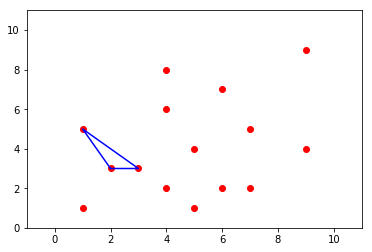

In [17]:
for i in range(0,n):
    xMelhor[0,i] = x[int(melhorRota[i])]
    yMelhor[0,i] = y[int(melhorRota[i])]
xMelhor[0,n] = xMelhor[0,0]
yMelhor[0,n] = yMelhor[0,0]
x2 = xMelhor[0,0:n+1]
y2 = yMelhor[0,0:n+1]       
plt.plot(x,y, 'ro')
plt.axis([-1, 11, 0, 11])
plt.plot(x2,y2,'b-')
plt.show()

In [18]:
# Região transmitir os valores do X e Y como acesso facilitado a estrutura de dados
import math

In [19]:
x = [1,4,7,5,9,2,4,6,1,5,3,9,4,6,7]
y = [5,6,5,4,4,3,2,2,1,1,3,9,8,7,2]
n = len(x)

In [20]:
n

15

In [21]:
#calculo da distância euclidiana de um ponto a todos os outros pontos
distancia = np.zeros((n,n))
xA = np.zeros(n)
yA = np.zeros(n)

In [22]:
#for i in range(0,n):
#    a[i] = m.sqrt((x[i]-x[j])**2

In [40]:
import mlrose
import numpy as np

In [41]:
X = df['X']

In [42]:
Y = df['Y']

In [43]:
X

0     1
1     4
2     7
3     5
4     9
5     2
6     4
7     6
8     1
9     5
10    3
11    9
12    4
13    6
14    7
Name: X, dtype: int64

In [44]:
Y

0     5
1     6
2     5
3     4
4     4
5     3
6     2
7     2
8     1
9     1
10    0
11    0
12    8
13    7
14    2
Name: Y, dtype: int64

In [45]:
#You can use np.c_
nparray = np.c_[([1,4,7,5,9,2,4,6,1,5,3,9,4,6,7]), ([5,6,5,4,4,3,2,2,1,1,3,9,8,7,2])]

In [46]:
coords_list = nparray

In [47]:
#criação de uma matriz de coordenadas das cidades
coords_list

array([[1, 5],
       [4, 6],
       [7, 5],
       [5, 4],
       [9, 4],
       [2, 3],
       [4, 2],
       [6, 2],
       [1, 1],
       [5, 1],
       [3, 3],
       [9, 9],
       [4, 8],
       [6, 7],
       [7, 2]])

In [48]:
# Criando uma lista de coordenadas, passagem manual, passando de 2 em 2
# Cada par de coordenadas inseridas em uma lista ordenada de pares onde os pares i especificam as coordenadas da cidade i)
listaCoordenadas = [(1, 5), (4, 6), (7, 5), (5, 4), (9, 4), (2, 3), (4, 2), (6, 2), (1,1), (5,1), (3,3), (9,9), (4,8), (6,7)]

In [49]:
listaCoordenadas

[(1, 5),
 (4, 6),
 (7, 5),
 (5, 4),
 (9, 4),
 (2, 3),
 (4, 2),
 (6, 2),
 (1, 1),
 (5, 1),
 (3, 3),
 (9, 9),
 (4, 8),
 (6, 7)]

In [92]:
# Initialize fitness function object using coords_list
# Objeto usado na chamada da função de calculo de coordenadas
fitness_coordenadas = mlrose.TravellingSales(coords = listaCoordenadas)

In [93]:
coords_list = [(1, 5), (4, 6), (7, 5), (5, 4), (9, 4), (2, 3), (4, 2), (6, 2), (1,1), (5,1), (3,3), (9,9), (4,8), (6,7)]

# Initialize fitness function object using coords_list
fitness_coords = mlrose.TravellingSales(coords = coords_list)

In [94]:
problem_fit = mlrose.TSPOpt(length = 14, fitness_fn = fitness_coords,maximize=False)

In [95]:
coords_list = [(1, 5), (4, 6), (7, 5), (5, 4), (9, 4), (2, 3), (4, 2), (6, 2), (1,1), (5,1), (3,3), (9,9), (4,8), (6,7)]
problem_no_fit = mlrose.TSPOpt(length = 8, coords = coords_list,
                               maximize=False)

In [96]:
best_state, best_fitness = mlrose.genetic_alg(problem_fit, random_state = 2)

In [97]:

print('The best state found is: ', best_state)

print('The fitness at the best state is: ', best_fitness)

The best state found is:  [12  4 11  6  8  5  0 10  9  7  3  2 13  1]
The fitness at the best state is:  45.65520284150806


In [51]:
#Confirmação de objeto usado para a proxima função de calculo de distancia para rotas

In [52]:
fitness_coordenadas

queremos resolver um problema de minimização de comprimento 8. Se usarmos a fitness_coordsfunção de aptidão definida acima, podemos definir um objeto de problema de otimização da seguinte maneira:
como maximize é falso, então queremos a menor rota possivel.

In [84]:
problema_fitness_coordenadas = mlrose.TSPOpt(length = 8, fitness_fn = fitness_coordenadas,maximize=False)

In [85]:
#Confirmação de objeto usado ao qual será definido o problema
# Define o problema de otimização
problema_fitness_coordenadas

In [86]:
# Solve problem using the genetic algorithm
best_state, best_fitness = mlrose.genetic_alg(listaCoordenadas, random_state = 2)

AttributeError: 'list' object has no attribute 'reset'

In [56]:
import mlrose
import numpy as np

In [74]:
# Create list of city coordinates
coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]

# Initialize fitness function object using coords_list
fitness_coords = mlrose.TravellingSales(coords = coords_list)

In [75]:
coords_list

[(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]

In [76]:
# Create list of distances between pairs of cities
#dist_list = [(0, 1, 3.1623), (0, 2, 4.1231), (0, 3, 5.8310), (0, 4, 4.2426), \
#             (0, 5, 5.3852), (0, 6, 4.0000), (0, 7, 2.2361), (1, 2, 1.0000), \
#             (1, 3, 2.8284), (1, 4, 2.0000), (1, 5, 4.1231), (1, 6, 4.2426), \
#             (1, 7, 2.2361), (2, 3, 2.2361), (2, 4, 2.2361), (2, 5, 4.4721), \
#             (2, 6, 5.0000), (2, 7, 3.1623), (3, 4, 2.0000), (3, 5, 3.6056), \
#             (3, 6, 5.0990), (3, 7, 4.1231), (4, 5, 2.2361), (4, 6, 3.1623), \
#             (4, 7, 2.2361), (5, 6, 2.2361), (5, 7, 3.1623), (6, 7, 2.2361)]

In [77]:
# Initialize fitness function object using dist_list
#fitness_dists = mlrose.TravellingSales(distances = dist_list)

In [81]:
problem_fit = mlrose.TSPOpt(length = 8, fitness_fn = fitness_coords,maximize=False)

In [82]:
coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), 
               (1, 5), (2, 3)]
problem_no_fit = mlrose.TSPOpt(length = 8, coords = coords_list,
                               maximize=False)

In [83]:
# Solve problem using the genetic algorithm
best_state, best_fitness = mlrose.genetic_alg(problem_fit, random_state = 2)

print('The best state found is: ', best_state)

print('The fitness at the best state is: ', best_fitness)

The best state found is:  [1 3 4 5 6 7 0 2]
The fitness at the best state is:  18.89580466036301


In [ ]:
print('The best state found is:  [1 3 4 5 6 7 0 2]')
print('The fitness at the best state is:  18.8958046604')

In [ ]:
# Solve problem using the genetic algorithm
best_state, best_fitness = mlrose.genetic_alg(problem_fit, mutation_prob = 0.2, 
					      max_attempts = 100, random_state = 2)

print('The best state found is: ', best_state)

print('The fitness at the best state is: ', best_fitness)

In [ ]:
# The best state found is:  [7 6 5 4 3 2 1 0]
# The fitness at the best state is:  17.3426175477